<a href="https://colab.research.google.com/github/coryncates/Prediction-of-Product-Sales/blob/main/Copy_of_PredictionOfProdSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
  - Author: Cory N. Cates
## Project Overview
## Load and Inspect Data


In [4]:
# Mount google drive and import necessary libraries

from google.colab import drive
drive.mount ('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Save path of file and inspect data

fpath= ('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/sales_predictions_2023.csv')

df_predict = pd.read_csv(fpath)
df_predict.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Further data analysis
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**bold text**## Clean Data

In [7]:
df_predict.shape

(8523, 12)

There are 8523 Rows with 12 columns

In [8]:
# Checking the variable data types

df_predict.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

There are zero Unamed columns.
Nothing that stands out in regards to the datatypes.

In [9]:
# Checking for duplicates

df_predict.duplicated().sum()

0

In [10]:
# Checking for Missing values
df_predict.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Checking for Missing values

df_sum = df_predict.isna().sum()
df_sum

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Check the datatype
type(df_sum)

pandas.core.series.Series

There are 1463 rows that are missing for Item_Weight and 2410 for Outlet_type

In [13]:
# Identify the percentage missing
df_perc = df_predict.isna().sum() / len(df_predict) * 100
df_perc

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [16]:
df_predict['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Exploratory Data Analysis

In [ ]:
# Evaluating the Item Weight column's counts
df_predict['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

# Boxplot giving an analysis of ITEM WEIGHT

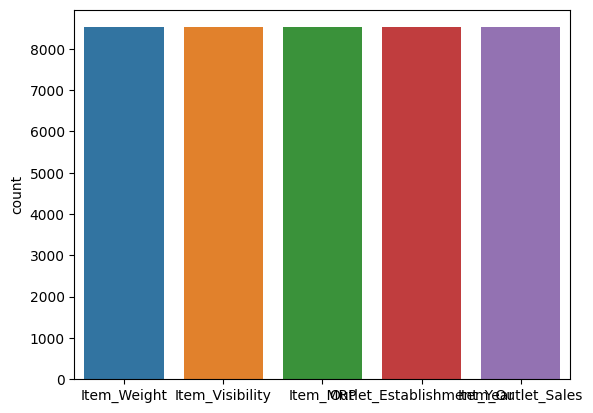

In [42]:
# Evaluating the Outlet Size column's counts

ax = sns.countplot(data = df_predict)

- Doesn't tell me much.  Need to use another plot, perhaps a scatterplot to give a better analysis.

# Evaluating Item Fat Content using Histplot

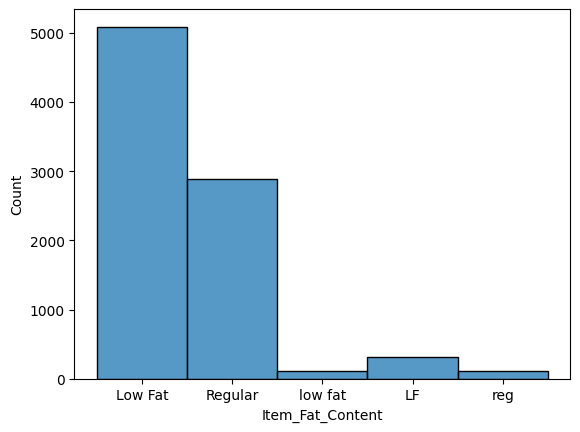

In [19]:
ax = sns.histplot(data = df_predict, x = 'Item_Fat_Content')

# Definitely a better analysis.  Doesn't follow a nice bell curve.  The distrubution falls off.  Low Fat is dominant.

Nothing looks too out of the ordinary

<Axes: >

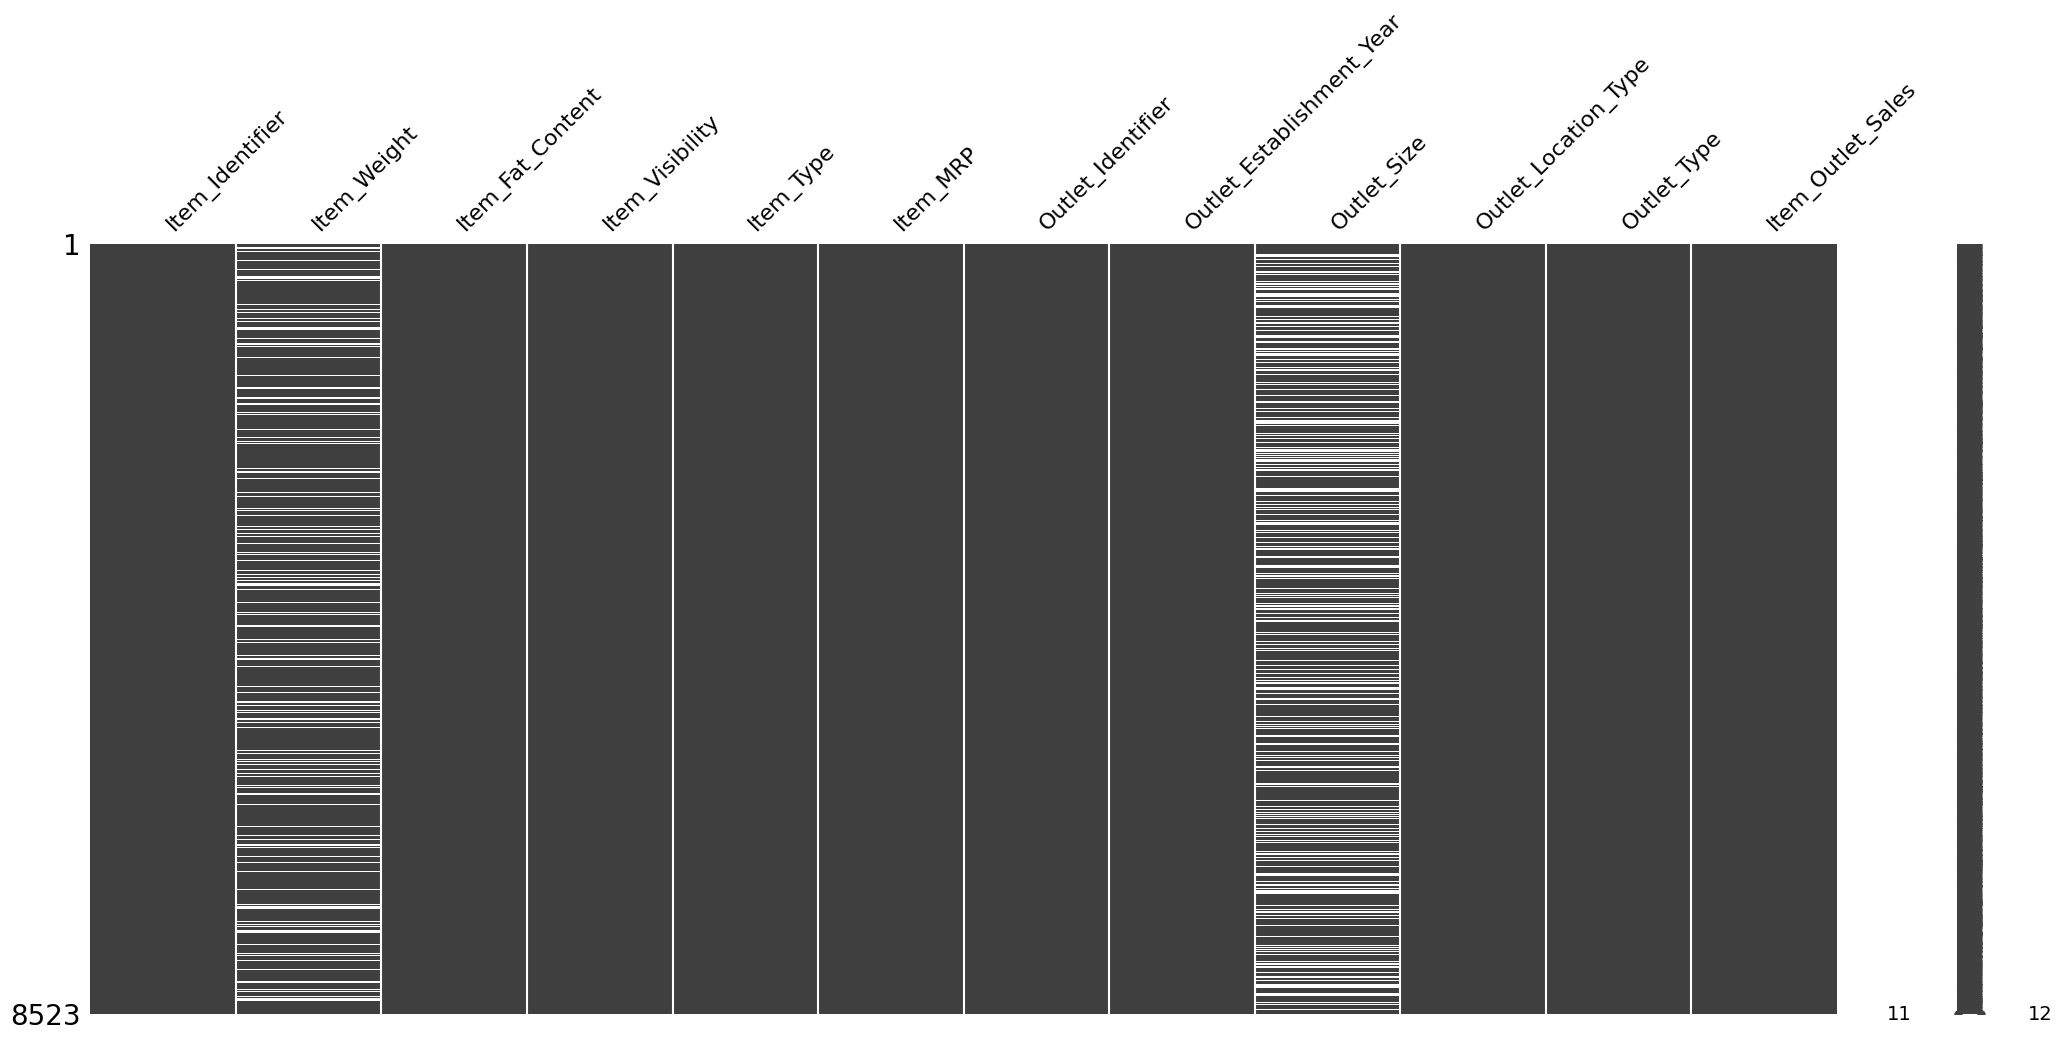

In [21]:
#Visualizing Null values with missingno; importing libraries as well
import missingno as msno
msno.matrix(df_predict)

## 5 Addressing the numeric and categorical columns with different techniques.

## We can use the df.select_dtypes() method to select only the columns of the specified data type.

In [20]:
# Saving name of num names for number columns
num_cols = df_predict.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Use the list of num names to fill null values with a -2
df_predict[num_cols] = df_predict[num_cols].fillna(-2)
df_predict[num_cols].isna().sum() # Confirms that missing values have been replaced

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [22]:
# Saving list of column names for object cols
cat_cols = df_predict.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [23]:
df_predict[cat_cols].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [24]:
# Use the list of cat names to fill null values with a UNKNOWN
df_predict[cat_cols] = df_predict[cat_cols].fillna('UNKNOWN')
df_predict[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

# Boxplot Analysis of Sales

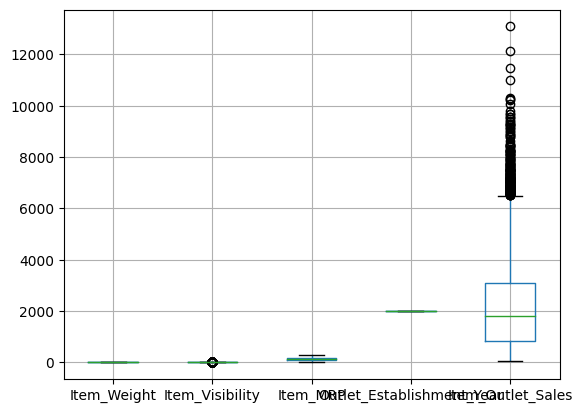

In [35]:
ax = df_predict.boxplot();

- Imediately I see a lot of outliers in Outlet_Sales.  The x axis is a bit convoluted.

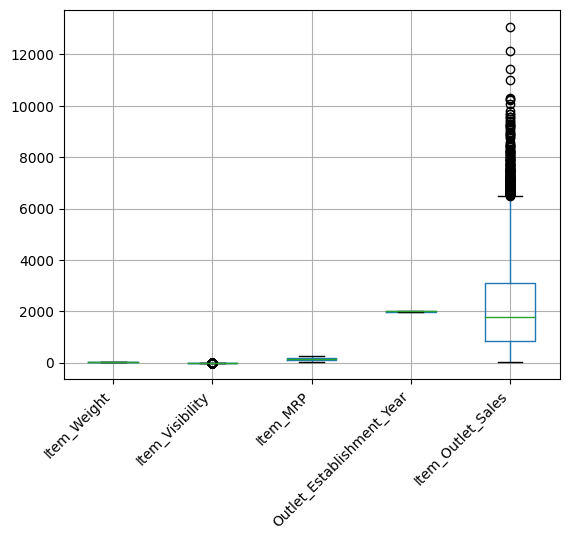

In [36]:
# Rotating the tick labels
ax = df_predict.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


## 6 Confirm no missing values

In [25]:
num = df_predict[num_cols].isna().sum()
cat = df_predict[cat_cols].isna().sum()

print(num)
print(cat)

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64


In [26]:
# Identify string columns to look for discrepancies
string_cols = df_predict.select_dtypes("object").columns
string_cols
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_predict[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')



Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
# Fixing discrepancies that are shown in Item_Fat_Content
df_predict['Item_Fat_Content'] = df_predict['Item_Fat_Content'].replace('reg', 'Regular')
df_predict['Item_Fat_Content'] = df_predict['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_predict['Item_Fat_Content'] = df_predict['Item_Fat_Content'].replace('LF', 'Low Fat')
df_predict['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Explanatory Data Analysis

In [27]:
# For all of the numerical columns, creating a min, max, and mean for added statistical data
import numpy as np
num_cols = df_predict.select_dtypes("number").columns

# Obtain the min, max, and mean for all numberical columns
for col in num_cols:
  df_min = np.min(df_predict[col])
  df_max = np.max(df_predict[col])
  df_mean = np.mean(df_predict[col])
print(f'Min is {df_min}, Max is {df_max}, and Mean is {df_mean}')





Min is 33.29, Max is 13086.9648, and Mean is 2181.288913575032


In [29]:
# Statistics for any numerical column
print(df_predict['Item_Weight'].min())
print(df_predict['Item_Weight'].max())
print(df_predict['Item_Weight'].mean())


4.555
21.35
12.857645184135976


## Addressing #8

In [31]:
df_predict.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [32]:
corr = df_predict.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


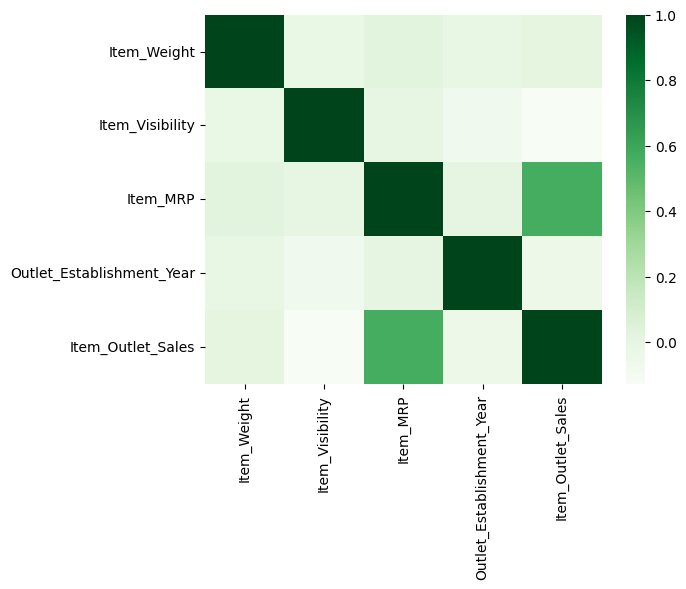

In [33]:
sns.heatmap(corr, cmap = 'Greens');

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

Here is the Data Dictionary for this dataset: